## 2016313844 Jeonghoon Park

### - Classify 'MNIST' data with KNN classifier
### - Classify 'make_moons ' and 'iris' data with Ensemble Classifier Model

# Classify 'MNIST' data with KNN classfier.

In [3]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, cache=True)

#fetch_mldata has been deprecated
#for getting same results, mnist data need to be reformed
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[: 60000] = mnist.data[reorder_train]
    mnist.target[: 60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000 :]=mnist.target[reorder_test + 60000]

mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

In [7]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(X_test.shape)

(70000, 784)
(70000,)
(60000, 784)
(10000, 784)


In [8]:
#Training set 순서 섞기 (shuffling)
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
shuffle_index

array([15842, 45279, 56833, ..., 29516, 51462,  6794])

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

y_knn_pred = knn_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

## Classify 'make_moons' and 'iris' data with Ensemble Cassifier Model

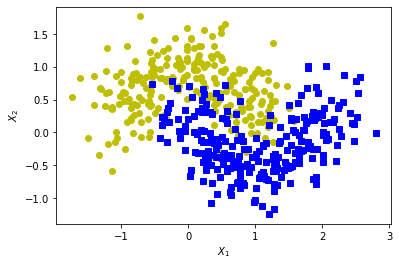

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [4]:

#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
    
bag_cif = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_cif.fit(X_train, y_train)
y_pred = bag_cif.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [5]:
tree_cif = DecisionTreeClassifier(random_state=42)
tree_cif.fit(X_train, y_train)
y_pred_tree = tree_cif.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(cif, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = cif.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab9', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2,  alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)


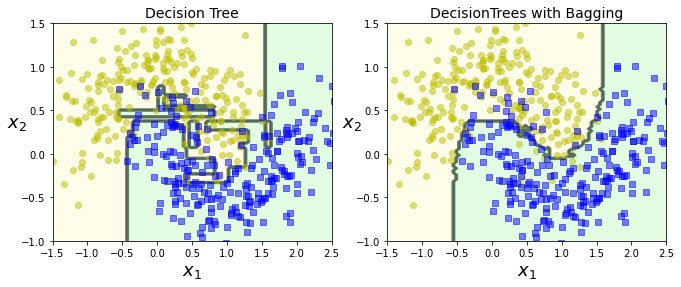

In [15]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_cif, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_cif, X, y)
plt.title("DecisionTrees with Bagging", fontsize=14)
plt.show()

In [18]:
### 여기부터 코드 읽어보면서 복습

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_rf))
np.sum(y_pred == y_pred_rf) / len(y_pred)

0.92
0.912


0.976

In [19]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

rnd_clf.feature_importances_

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

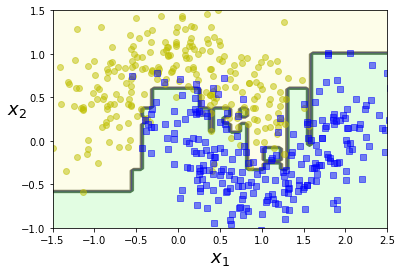

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

plot_decision_boundary(ada_clf, X, y)